In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Missing value treatment

In [7]:
df['Age'].mean()

29.69911764705882

In [8]:
df['Age'].median()

28.0

In [9]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [10]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [12]:
df.drop(columns='Cabin', inplace=True)

In [13]:
# Removing duplicates
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
# Converting categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


### Handlig Outliers

In [16]:
drop_cols=['Survived']

In [17]:
X=df.drop(drop_cols,axis=1)
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [18]:
def boxPlot(dff):
    d = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

In [19]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

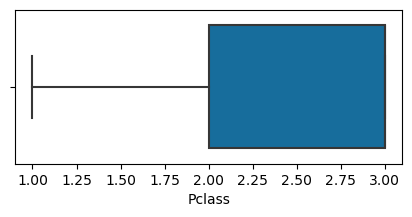

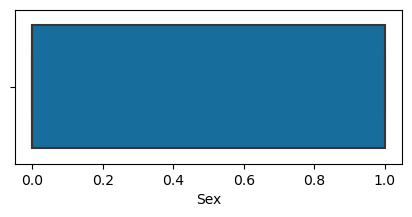

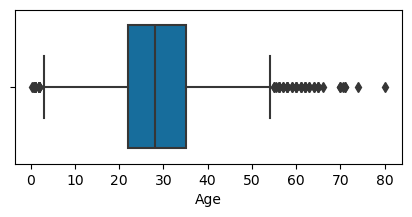

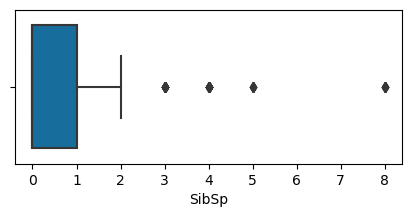

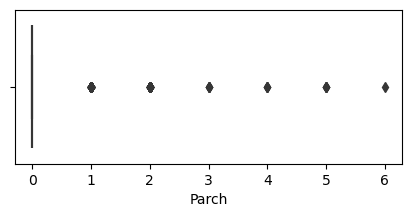

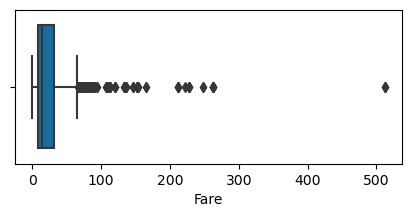

In [20]:
boxPlot(df)

In [21]:
def boxPlot_transform(dff):
    d = df.copy()
    for column in ['Pclass','Sex','Age','SibSp','Parch','Fare']:
        plt.figure(figsize=(5, 2))
        
        # Calculate IQR
        Q1 = d[column].quantile(0.25)
        Q3 = d[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        d[column] = d[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
        
        sns.boxplot(x=column, data=d, palette="colorblind")
    return d

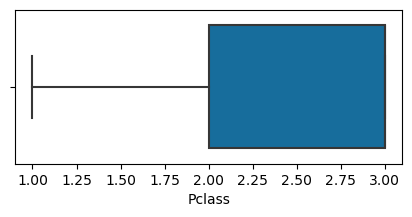

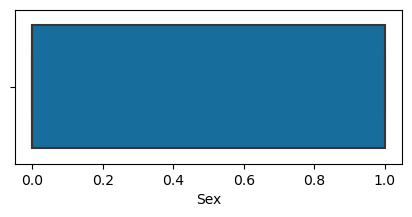

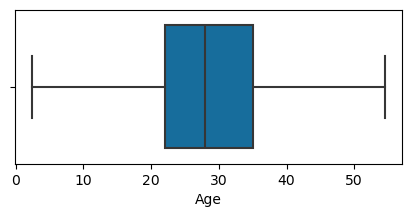

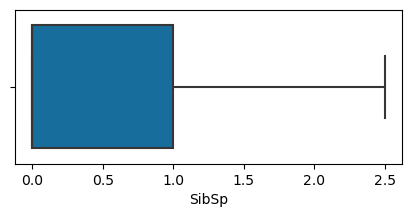

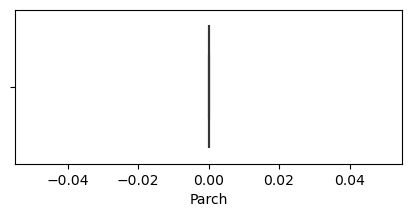

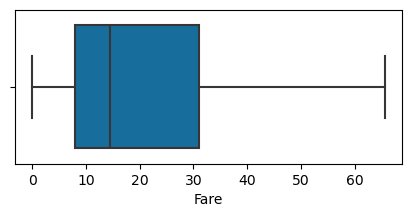

In [22]:
dff = boxPlot_transform(df)

In [23]:
dff.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1.0,0.0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1.0,0.0,PC 17599,65.6344,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0.0,0.0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1.0,0.0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0.0,0.0,373450,8.0500,False,True


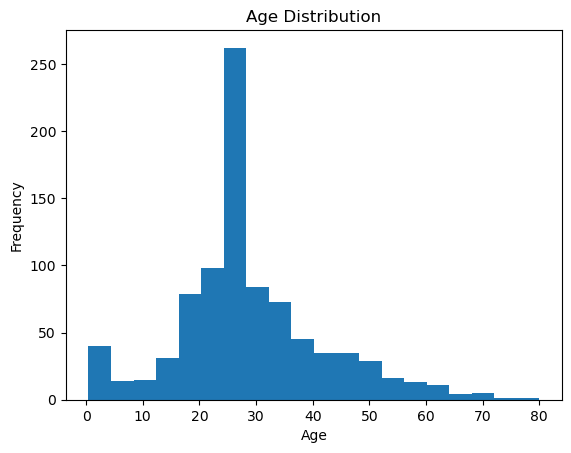

In [24]:
# Histograms
df['Age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

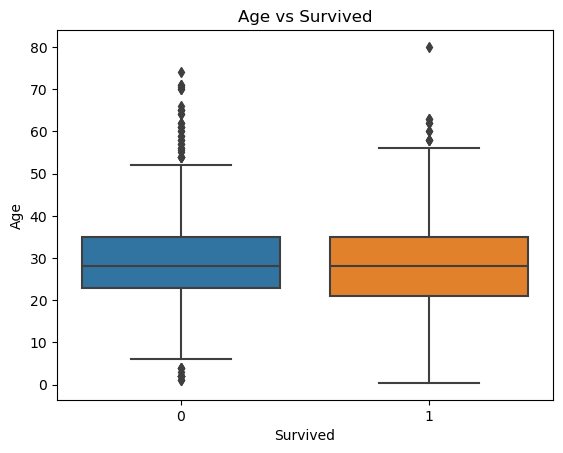

In [25]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')
plt.show()

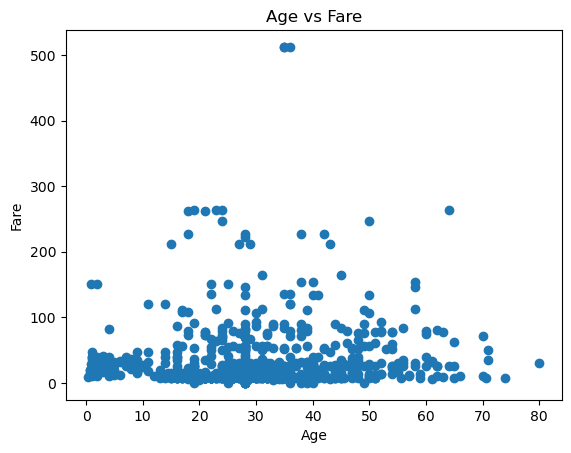

In [26]:
plt.scatter(df['Age'], df['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

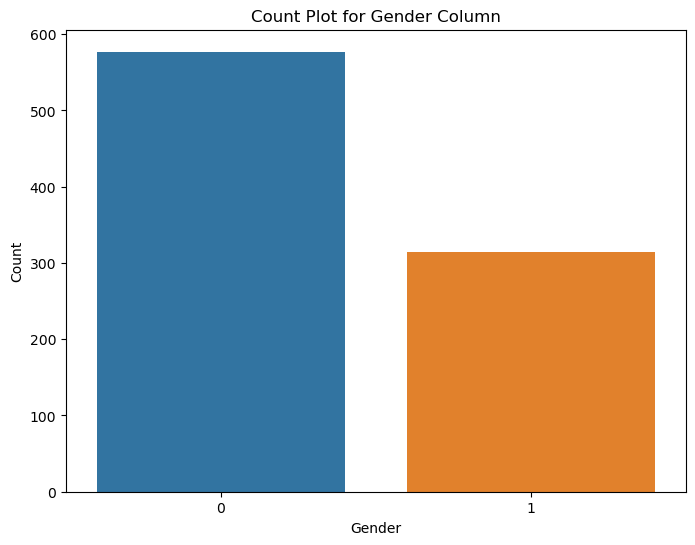

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex')
plt.title('Count Plot for Gender Column')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

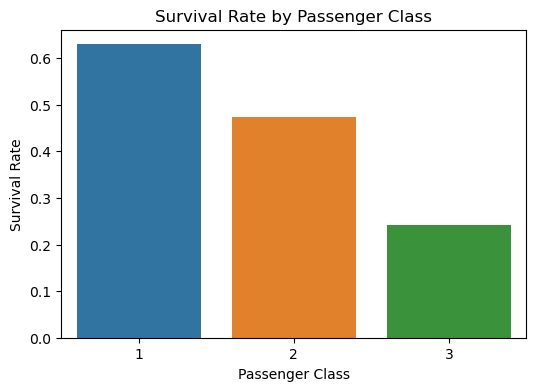

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

In [29]:
numeric_df = df.select_dtypes(include=['number'])

In [30]:
corr_matrix = numeric_df.corr()

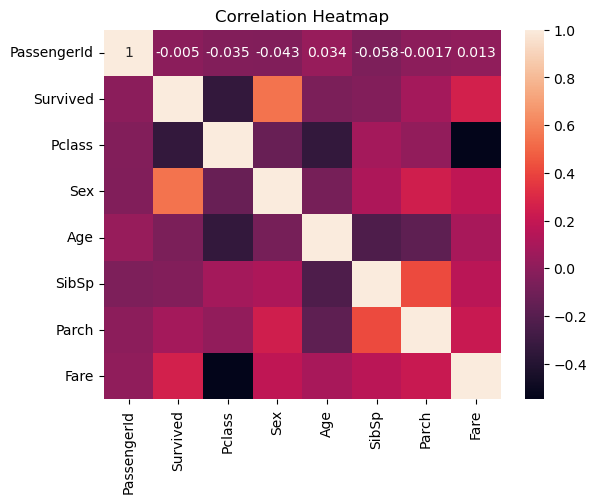

In [31]:
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [33]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,True
1,1,1,1,38.0,1,0,71.2833,False,False
2,1,3,1,26.0,0,0,7.9250,False,True
3,1,1,1,35.0,1,0,53.1000,False,True
4,0,3,0,35.0,0,0,8.0500,False,True


In [34]:
x= df[['Pclass','Age','Sex']]
y=df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import random
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from random import seed
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=123, max_iter=1000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print('Training set accuracy: {:.4f}'.format(model.score(x_train, y_train) * 100))
print('Test set accuracy: {:.4f}'.format(model.score(x_test, y_test) * 100))
print(classification_report(y_test, predictions))

# Plot the conf
sns.heatmap(cm / np.sum(cm), annot=True, fmt=".2%", cmap='Greens')
plt.show()


# Spliting the data into training and testing

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
x_train.shape

(712, 3)

In [38]:
y_train.shape

(712,)

# RandomForestClassifier

In [39]:
rf = RandomForestClassifier()

param_grid = {
    'bootstrap' : [True, False],
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', 'auto'],
    'max_depth': [None, 10, 20,50,100,200],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


Random_search = RandomizedSearchCV(rf, param_grid, n_iter=50, cv=10, n_jobs=-1,scoring='roc_auc')


Random_search.fit(x_train, y_train)


best_params = Random_search.best_params_
best_score = Random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

clf_rf = Random_search.best_estimator_

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best Score: 0.8496960344182567


Random Forest Accuracy: 0.8324022346368715
Random Forest AUC Score: 0.8212355212355212
[[93 12]
 [18 56]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



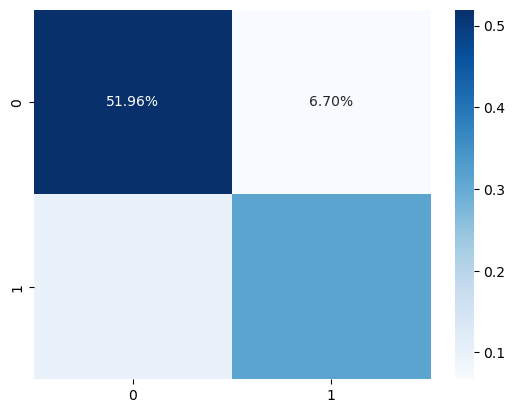

In [40]:
rf_pred = clf_rf.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest AUC Score:", rf_auc)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))
# Displaying confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()

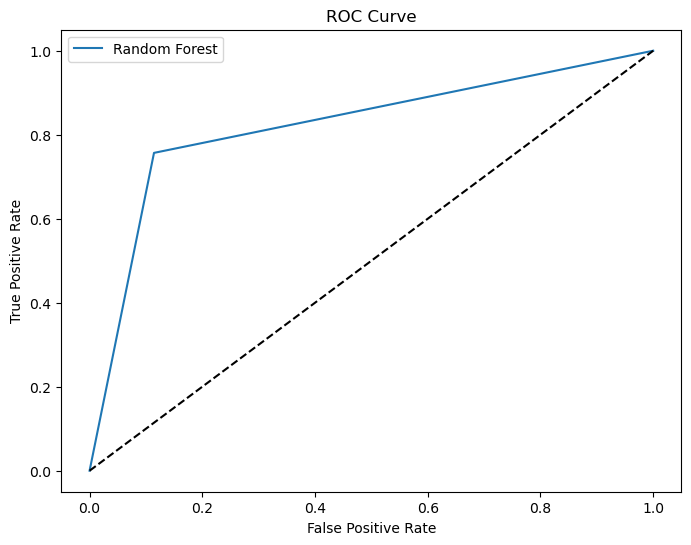

In [41]:
# Plotting ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# DecisionTreeClassifier

Training set accuracy: 87.5000
Test set accuracy: 77.6536
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



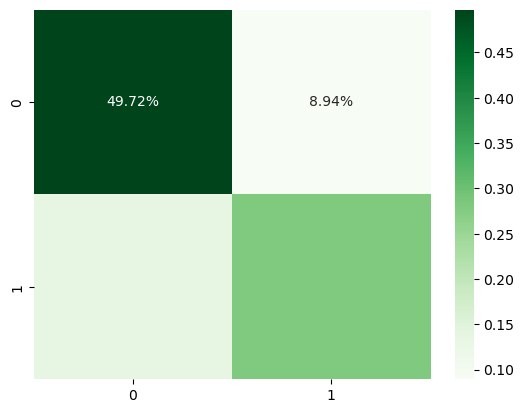

In [42]:
#By entropy
model=tree.DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=123)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print('Training set accuracy: {:.4f}'.format(model.score(x_train, y_train)*100))
print('Test set accuracy: {:.4f}'.format(model.score(x_test, y_test)*100))
print(classification_report(y_test, predictions))
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Greens')
plt.show()

In [43]:
# Calculating accuracy and AUC score for Decision Tree (entropy)
dt_entropy_accuracy = accuracy_score(y_test, predictions)
dt_entropy_auc = roc_auc_score(y_test, predictions)

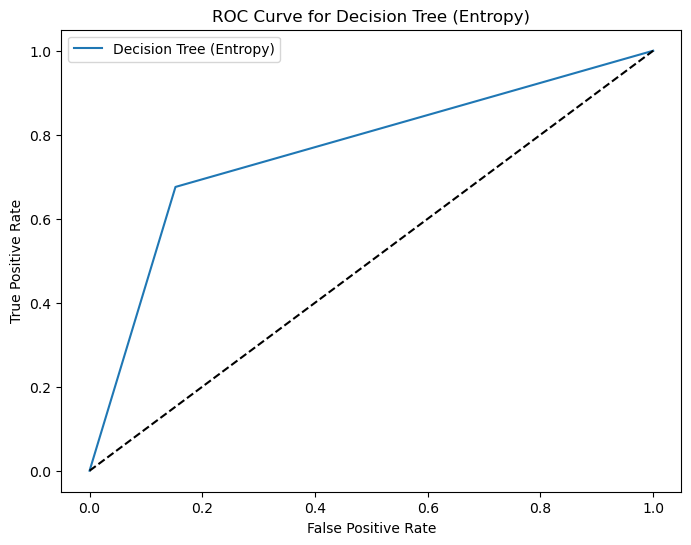

Decision Tree (Entropy) Accuracy: 0.776536312849162
Decision Tree (Entropy) AUC Score: 0.7616473616473617


In [44]:
# Plotting ROC curve for Decision Tree (entropy)
fpr_dt_entropy, tpr_dt_entropy, _ = roc_curve(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_entropy, tpr_dt_entropy, label="Decision Tree (Entropy)")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree (Entropy)")
plt.legend()
plt.show()
# Displaying accuracy and AUC score for Decision Tree (entropy)
print("Decision Tree (Entropy) Accuracy:", dt_entropy_accuracy)
print("Decision Tree (Entropy) AUC Score:", dt_entropy_auc)

[[89 16]
 [24 50]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



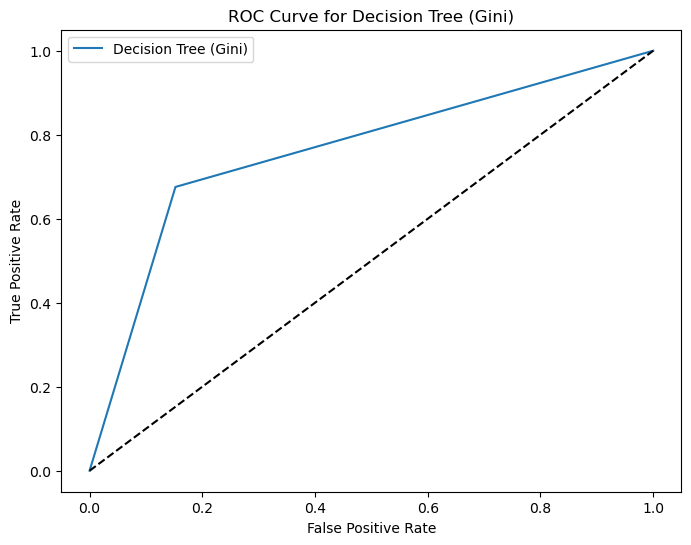

Decision Tree (Gini) Accuracy: 0.776536312849162
Decision Tree (Gini) AUC Score: 0.7616473616473617


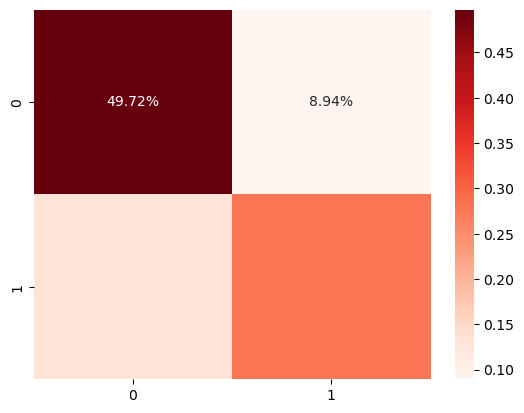

In [45]:
# Initializing and fitting the Decision Tree Classifier (using gini criterion)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=123)
dt_gini.fit(x_train, y_train)

# Making predictions for Decision Tree (gini)
dt_gini_pred = dt_gini.predict(x_test)

# Calculating accuracy and AUC score for Decision Tree (gini)
dt_gini_accuracy = accuracy_score(y_test, dt_gini_pred)
dt_gini_auc = roc_auc_score(y_test, dt_gini_pred)
print(confusion_matrix(y_test, dt_gini_pred))
        
print(classification_report(y_test, dt_gini_pred))

# Plotting ROC curve for Decision Tree (gini)
fpr_dt_gini, tpr_dt_gini, _ = roc_curve(y_test, dt_gini_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt_gini, tpr_dt_gini, label="Decision Tree (Gini)")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree (Gini)")
plt.legend()
plt.show()

# Displaying accuracy and AUC score for Decision Tree (gini)
print("Decision Tree (Gini) Accuracy:", dt_gini_accuracy)
print("Decision Tree (Gini) AUC Score:", dt_gini_auc)
cm = confusion_matrix(y_test, dt_gini_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Reds')
plt.show()

# Support Vector Machine Classifier (SVM)

In [ ]:
from sklearn.svm import SVC

SVM_model = SVC(probability=True).fit(x_train, y_train)

svm_param = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": ["scale","auto"],
             "kernel": ["rbf","linear","poly","sigmoid"],
             "degree":[2,3,4]
             }



SVM_ = RandomizedSearchCV(SVM_model, svm_param, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=1)

SVM = SVM_.fit(x_train, y_train).best_estimator_
pred_svm = SVM_.predict(x_test)
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test, pred_svm))
cm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Greens')
plt.show()

# XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()

param_dist = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}
xgb_model = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=10, random_state=1)
XGB = xgb_model.fit(x_train_std, y_train, eval_metric='logloss')#.best_estimator_
pred_xgb = xgb_model.predict(x_test_std)
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))
cm = confusion_matrix(y_test, pred_xgb)
sns.heatmap(cm/np.sum(cm), annot=True, fmt=".2%", cmap='Blues')
plt.show()

# Logistic Regression Classifier